<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/Baby_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [2]:
# Define the grid world dimensions and rewards
grid_size = [5, 5]
goal_state = [2, 3]
obstacle_states = [[2, 4], [3, 2]]

rewards = np.zeros(grid_size)
# rewards = np.full(grid_size, 0.1)

# Assign rewards
for row in range(grid_size[0]):
    for col in range(grid_size[1]):
        if [row, col] == goal_state:
            rewards[row, col] = 1
        elif [row, col] in obstacle_states:
            rewards[row, col] = -1

In [14]:
p=1
def stochastic_move(current_state, action):
    """
    Given a current state and action, returns the next state.
    Assumes p*100 chance of moving in the intended direction,
    and 10% chance of moving in a direction perpendicular to the intended action.
    """
    if random.random() < p:  # p*100 chance
        next_state = move(current_state, action)
    else:  # (1-p)% chance
        perpendicular_actions = []
        if action == 'U' or action == 'D':
            perpendicular_actions = ['L', 'R']
        else:
            perpendicular_actions = ['U', 'D']
        next_action = random.choice(perpendicular_actions)
        next_state = move(current_state, next_action)

    return next_state

def move(current_state, action):
    row, col = current_state
    if action == 'U':
        row = max(0, row - 1)
    elif action == 'D':
        row = min(grid_size[0] - 1, row + 1)
    elif action == 'L':
        col = max(0, col - 1)
    elif action == 'R':
        col = min(grid_size[1] - 1, col + 1)

    return (row, col)


In [15]:
def visualize_grid(state=None):
    grid = np.zeros((grid_size[0], grid_size[1]))

    for obs in obstacle_states:
        grid[obs[0], obs[1]] = -1

    grid[goal_state[0], goal_state[1]] = 1

    if state:
        grid[state[0], state[1]] = 0.5

    plt.imshow(grid, cmap='coolwarm', origin='upper')
    plt.colorbar(label='Cell Value')
    plt.title("Grid World")
    plt.xticks(np.arange(0, grid_size[1], 1))
    plt.yticks(np.arange(0, grid_size[0], 1))

    if state:
        plt.text(state[1], state[0], 'S', fontsize=12, ha='center', va='center', color='white')

    plt.text(goal_state[1], goal_state[0], 'G', fontsize=12, ha='center', va='center', color='white')

    for obs in obstacle_states:
        plt.text(obs[1], obs[0], 'X', fontsize=12, ha='center', va='center', color='white')

    # plt.pause(0.1)
    plt.show()


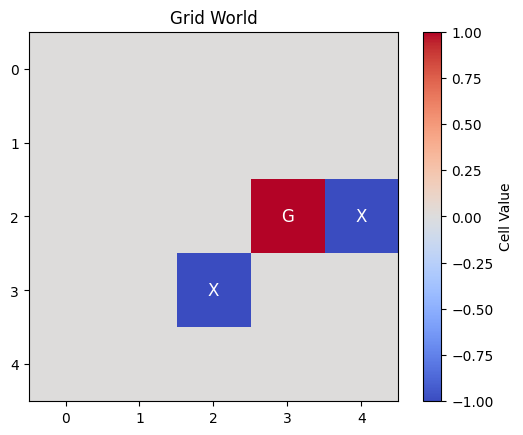

In [16]:
visualize_grid()

In [17]:
# Initialize Q-table
states = [(i, j) for i in range(grid_size[0]) for j in range(grid_size[1])]
actions = ['U', 'D', 'L', 'R']
q_table = {(i, j): {a: 0 for a in actions} for i, j in states}
# print(q_table)

In [18]:
def visualize_grid_with_q_values(q_table):
    grid = np.zeros((grid_size[0], grid_size[1]))

    for obs in obstacle_states:
        grid[obs[0], obs[1]] = -1

    grid[goal_state[0], goal_state[1]] = 1

    plt.imshow(grid, cmap='coolwarm', origin='upper')
    plt.colorbar(label='Cell Value')
    plt.title("Grid World with Q-values")
    plt.xticks(np.arange(0, grid_size[1], 1))
    plt.yticks(np.arange(0, grid_size[0], 1))

    for state, actions in q_table.items():
        i, j = state
        best_action = max(actions, key=actions.get)

        if best_action == 'U':
            plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'D':
            plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'L':
            plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'R':
            plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')

    plt.text(goal_state[1], goal_state[0], 'G', fontsize=12, ha='center', va='center', color='white')

    for obs in obstacle_states:
        plt.text(obs[1], obs[0], 'X', fontsize=12, ha='center', va='center', color='white')

    plt.show()


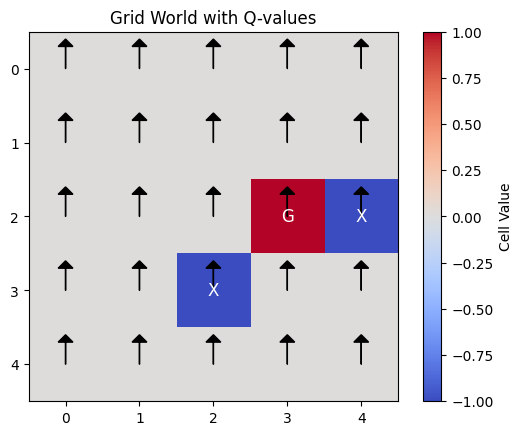

In [19]:
visualize_grid_with_q_values(q_table)

In [20]:
# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

In [21]:
# Function to choose an action based on epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return max(q_table[state], key=q_table[state].get)


In [24]:
# Initialize Q-table
states = [(i, j) for i in range(grid_size[0]) for j in range(grid_size[1])]
actions = ['U', 'D', 'L', 'R']
q_table = {(i, j): {a: 0 for a in actions} for i, j in states}
# print(q_table)

# Training loop
for episode in range(1, 20001):
    state = (0, 0)
    total_reward = 0

    while state != tuple(goal_state):
        action = choose_action(state)
        next_state = stochastic_move(state, action)
        row, col = next_state
        reward = rewards[row, col]
        # next_state, reward = step(state, action)
        total_reward += reward

        # Q-value update
        best_next_action = max(q_table[next_state], key=q_table[next_state].get)
        q_table[state][action] = (1 - alpha) * q_table[state][action] + \
                                 alpha * (reward + gamma * q_table[next_state][best_next_action])

        # Move to the next state
        state = next_state

    # Print updates every 10 episodes for demonstration
    # if episode % 10 == 0:
    #     print(f"Episode: {episode}, Total Reward: {total_reward}")

# Display the learned Q-values
print("\nLearned Q-values:")
for state in states:
    print(f"State: {state} - {q_table[state]}")



Learned Q-values:
State: (0, 0) - {'U': 0.5904899999999987, 'D': 0.5314409999999985, 'L': 0.5904899999999987, 'R': 0.6560999999999991}
State: (0, 1) - {'U': 0.6560999999999991, 'D': 0.5904899999999987, 'L': 0.5904899999999987, 'R': 0.7289999999999993}
State: (0, 2) - {'U': 0.7289999999999993, 'D': 0.8099999999999778, 'L': 0.6560999999999991, 'R': 0.8099999999999993}
State: (0, 3) - {'U': 0.8099999999999993, 'D': 0.8999999999999994, 'L': 0.7289999999999993, 'R': 0.7289999999999993}
State: (0, 4) - {'U': 0.7102313037386433, 'D': 0.6031957467346034, 'L': 0.8099999999999993, 'R': 0.6968077622285016}
State: (1, 0) - {'U': 0.5904899999999987, 'D': 0.2483766248238613, 'L': 0.37721477924626734, 'R': 0.4499050621586459}
State: (1, 1) - {'U': 0.6560999999999991, 'D': 0.1463027654259259, 'L': 0.3461384253114915, 'R': 0.4993204056888728}
State: (1, 2) - {'U': 0.7289999999999993, 'D': 0.4526585064209128, 'L': 0.548090129758339, 'R': 0.8999999999999994}
State: (1, 3) - {'U': 0.8099999999999993, 'D'

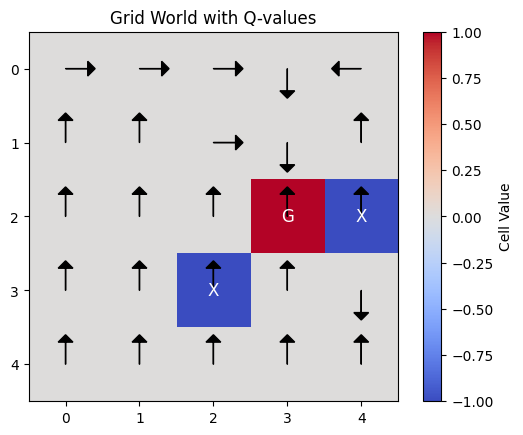

In [25]:
visualize_grid_with_q_values(q_table)